# Capstone Project - Machine Learning Engineer Nanodegree

## By Tatiana Zolhof Panisset - December 2018



Heart Disease is a global problem that takes lives of millions of people every year. Using a dataset of people with several information about their characteristics and health condition, the goal of this project is to predict the presence of heart disease in them, creating a model that can be used in new data, not contained in the dataset. This would allow to take action to prevent the evolution of the condition, when it is already present, but also maximize the awareness of the problem as a whole, encouraging prevention efforts. 



In [1]:
import pandas as pd

import numpy as np

In [2]:
data = pd.read_csv("processed.cleveland.data.txt", names = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
                                "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "pred"],
                                na_values = '?')

## Exploring and Preprocessing the dataset

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 1. Checking and adjusting missing values

In [4]:
null_data = data[data.isnull().any(axis=1)]

In [5]:
null_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0



Since there are only 6 rows with missing values, and the respective columns represent categorical variables (ca and thal), a reasonable strategy is to replace the NaN values with the median values of the corresponding columns:



In [6]:
print data['ca'].median(), data['thal'].median()

0.0 3.0


In [7]:
data = data.fillna(data.median())

In [8]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


### 2. Getting data summaries

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
len(data)

303

In [11]:
data.median()

age          56.0
sex           1.0
cp            3.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
pred          0.0
dtype: float64

### 3. Creating visualizations to check the features’ distributions

#### 3.1. Creating the features and outcome sets

In [12]:
outcomes = data['pred']
features = data.drop('pred', axis = 1)

In [13]:
outcomes.head()

0    0
1    2
2    1
3    0
4    0
Name: pred, dtype: int64

In [14]:
features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


#### 3.2. Visualizing numerical data

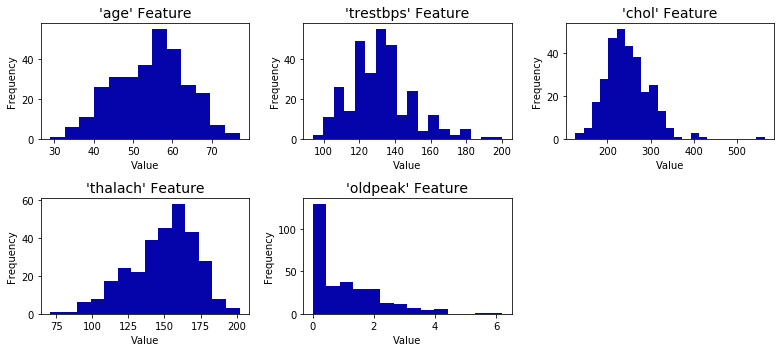

In [16]:
import matplotlib.pyplot as pl

fig = pl.figure(figsize = (11,5));

for i, feature in enumerate(["age", "trestbps", "chol", "thalach", "oldpeak"]):
    ax = fig.add_subplot(2, 3, i+1)
    ax.hist(features[feature], bins = 'auto', color = '#0504aa')
    ax.set_title("'%s' Feature"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

fig.tight_layout()
fig.show()

#### 3.3. Visualizing categorical data

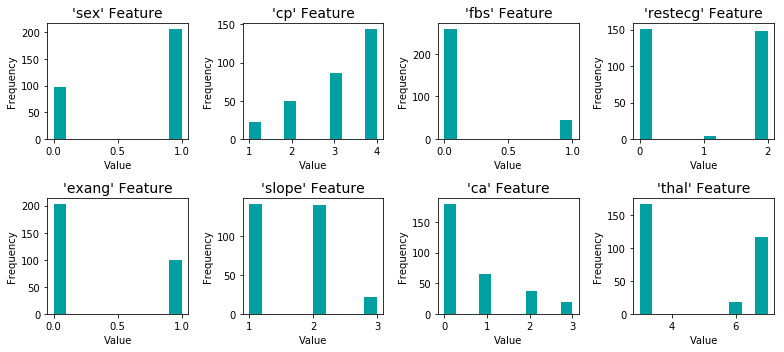

In [17]:
fig = pl.figure(figsize = (11,5));

for i, feature in enumerate(["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]):
    ax = fig.add_subplot(2, 4, i+1)
    ax.hist(features[feature], bins = 'auto', color = '#00A0A0')
    ax.set_title("'%s' Feature"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

fig.tight_layout()
fig.show()

### 4. Applying feature scaling and transformations

On the plots above, it is possible to see that the 'oldpeak' feature is skewed. Hence, a log-transformation will be applied so that the very large and very small values do not negatively affect the performance of a learning algorithm: 

In [19]:
# Log-transform the skewed feature
features_log_transformed = pd.DataFrame(data = features)
features_log_transformed['oldpeak'] = features['oldpeak'].apply(lambda x: np.log(x + 1))

In addition to performing transformations on features that are skewed, it is good practice to perform some type of scaling on numerical features, ensuring that each feature is treated equally when applying supervised learners: 

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.720860,3.0,0.0,6.0
1,0.791667,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.596725,2.0,3.0,3.0
2,0.791667,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.756545,2.0,2.0,7.0
3,0.166667,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.842179,3.0,0.0,3.0
4,0.250000,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.576969,1.0,0.0,3.0


For the categorical features, the goal of the plots was to confirm that there were no columns with the same value - in this case, those could be excluded from the dataset since they would not be adding any useful information.  

### 5. One-hot encoding categorical variables

In [21]:
outcomes = outcomes.map({1.0:1, 2.0:1, 3.0:1, 4.0:1, 0.0:0})

In [22]:
outcomes.head()

0    0
1    1
2    1
3    0
4    0
Name: pred, dtype: int64

In [23]:
features_final = pd.get_dummies(features_log_minmax_transform, prefix = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"], 
                       columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"])

In [24]:
features_final.head(1)

,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.708333,0.481132,0.244292,0.603053,0.72086,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0


### 6. Checking and adjusting imbalanced classes

Text(0.5,1,'Outcome distribution')

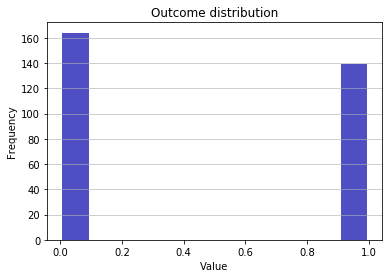

In [25]:
n, bins, patches = pl.hist(x=outcomes, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
pl.grid(axis='y', alpha=0.75)
pl.xlabel('Value')
pl.ylabel('Frequency')
pl.title('Outcome distribution')

The plot above shows that the outcome classes have a similar number of occurrences on the dataset; hence, no additional action is needed in this case. Also, since the classes are not imbalanced, the use of accuracy as a metric to assess the Machine Learning models that will be tested is appropriate.

### 7. Outlier detection

The Tukey's Method will be used here for identifying outliers in numerical variables: an outlier step is calculated as 1.5 times the interquartile range (IQR), and a data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [26]:
from IPython.display import display

numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for item in numerical:
    
    Q1 = np.percentile(features_final[item], 25)
    Q3 = np.percentile(features_final[item], 75)
    step = 1.5 * (Q3 - Q1)
    print("Data points considered outliers for the column '{}':".format(item))
    display(features_final[~((features_final[item] >= Q1 - step) & (features_final[item] <= Q3 + step))])
    indices = features_final[~((features_final[item] >= Q1 - step) & (features_final[item] <= Q3 + step))].index.values

Data points considered outliers for the column 'age':


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0


Data points considered outliers for the column 'trestbps':


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
14,0.479167,0.735849,0.166667,0.694656,0.312283,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
83,0.812500,0.811321,0.337900,0.603053,0.615313,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
126,0.562500,1.000000,0.369863,0.473282,0.879993,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
172,0.625000,0.754717,0.280822,0.549618,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
183,0.625000,0.792453,0.328767,0.564885,0.893680,0,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1
188,0.520833,0.924528,0.358447,0.946565,0.000000,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
201,0.729167,0.811321,0.454338,0.633588,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
213,0.770833,0.792453,0.232877,0.717557,0.483138,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
231,0.541667,0.811321,0.458904,0.351145,0.833908,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


Data points considered outliers for the column 'chol':


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
48,0.750000,0.433962,0.664384,0.656489,0.424191,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
121,0.708333,0.528302,0.641553,0.633588,0.879993,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
152,0.791667,0.198113,1.000000,0.679389,0.615313,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
173,0.687500,0.433962,0.611872,0.656489,0.533384,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
181,0.562500,0.377358,0.646119,0.603053,0.665168,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


Data points considered outliers for the column 'thalach':


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
245,0.791667,0.245283,0.253425,0.0,0.483138,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


Data points considered outliers for the column 'oldpeak':


,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0


It is possible to see that a few outliers were found for the variables 'trestbps' (9 observations), 'chol' (5 observations), and 'thalach' (1 observation). Since those observations are not common among the features, the quantity is not extremely high, the dataset is not very large (so that every observation is important, and should not be easily discarded), and no clustering distance-based algorithms will be used (those are specially affected by outliers), they will be kept for the next steps; however, it is necessary to observe/monitor any impact they might bring to the algorithms' performance.   

### 8. Splitting the data in training and testing sets

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, outcomes, test_size = 0.20, random_state = 42)

In [28]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 242 samples.
Testing set has 61 samples.


## Building the Machine Learning models

### 1. Logistic Regression

In [30]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 42)
log_reg = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'accuracy')
acc_log_reg = np.mean(log_reg)
print ("Accuracy for Logistic Regression: ", acc_log_reg)

('Accuracy for Logistic Regression: ', 0.8349489795918368)


### 2. Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state = 42)
dec_tree = cross_val_score(model2, X_train, y_train, cv = kf, scoring = 'accuracy')
acc_dec_tree = np.mean(dec_tree)
print ("Accuracy for Decision Tree Classifier: ", acc_dec_tree)

('Accuracy for Decision Tree Classifier: ', 0.6947278911564626)


### 3. Adaboost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(random_state = 42)
adaboost = cross_val_score(model3, X_train, y_train, cv = kf, scoring = 'accuracy')
acc_adaboost = np.mean(adaboost)
print ("Accuracy for Adaboost Classifier: ", acc_adaboost)

('Accuracy for Adaboost Classifier: ', 0.7522108843537415)


### 4. Support Vector Machine

In [34]:
from sklearn.svm import SVC

model4 = SVC(random_state = 42)
svm = cross_val_score(model4, X_train, y_train, cv = kf, scoring = 'accuracy')
acc_svm = np.mean(svm)
print ("Accuracy for Support Vector Machine: ", acc_svm)

('Accuracy for Support Vector Machine: ', 0.8348639455782314)


### 5. Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(random_state = 42)
rf = cross_val_score(model5, X_train, y_train, cv = kf, scoring = 'accuracy')
acc_rf = np.mean(rf)
print ("Accuracy for Random Forest Classifier: ", acc_rf)

('Accuracy for Random Forest Classifier: ', 0.7770408163265305)


## Tuning the best model - Logistic Regression

### 1. Trying different values for the penalty and regularization parameter C 

In [38]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(random_state = 42)
parameters = {'penalty' : ['l1', 'l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_obj = GridSearchCV(clf, parameters, scoring = 'accuracy')
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

In [39]:
grid_fit.best_params_ 

{'C': 0.1, 'penalty': 'l2'}

### 2. Making predictions on the training set with the final model

In [40]:
from sklearn.metrics import accuracy_score

train_predictions = best_clf.predict(X_train)
acc_train = accuracy_score(y_train, train_predictions)
print ("Accuracy of the best model on the train set:", acc_train)

('Accuracy of the best model on the train set:', 0.8512396694214877)


### 3. Making predictions on the testing set with the final model

In [41]:
best_predictions = best_clf.predict(X_test)
acc = accuracy_score(y_test, best_predictions)
print ("Accuracy of the best model on the test set:", acc)

('Accuracy of the best model on the test set:', 0.9016393442622951)


## Analyzing the results

### 1. Getting the confusion matrix

Text(0.5,1,'Confusion Matrix')

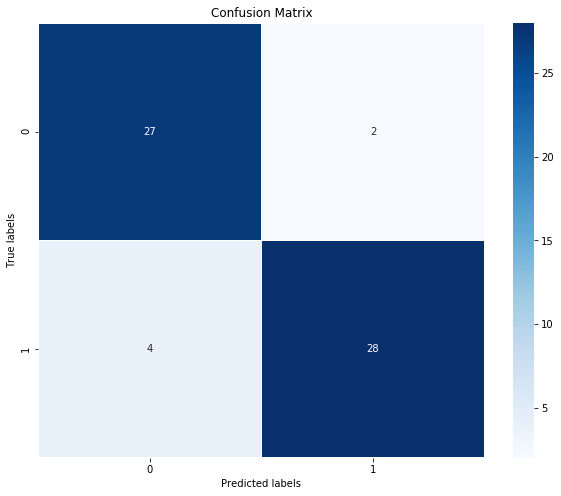

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, best_predictions)
fig, ax = pl.subplots(figsize = (10,8))         
sns.heatmap(cm, annot = True, linewidths = .5, ax = ax, cmap = "Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 

### 2. Insight about feature importance

#### 2.1. Using the absolute weights of the best model

In [43]:
coef = (abs(best_clf.coef_)).tolist()
flatten = lambda l: [item for sublist in l for item in sublist]
coef = flatten(coef)
features_list = list(X_train.columns.values)
d = {'feature' : features_list, 'coefficient' : coef}
importances = pd.DataFrame(d, columns = ['feature', 'coefficient'])
importances = importances.sort_values(by = ['coefficient'], ascending = False)
importances

,feature,coefficient
21,ca_0.0,0.782885
10,cp_4.0,0.585830
27,thal_7.0,0.462305
18,slope_1.0,0.461873
25,thal_3.0,0.447858
19,slope_2.0,0.415948
23,ca_2.0,0.392176
5,sex_0.0,0.348573
4,oldpeak,0.342671
9,cp_3.0,0.334881


Text(0,0.5,'Absolute weight')

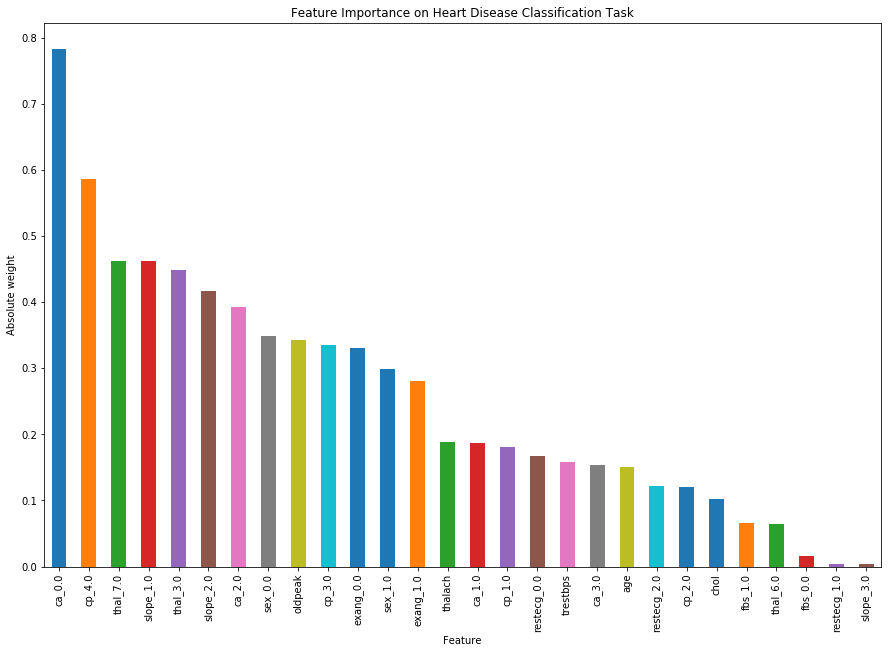

In [44]:
fig = importances.plot.bar(x = 'feature', y = 'coefficient', rot = 90, title = 'Feature Importance on Heart Disease Classification Task',
                    figsize=(15, 10), legend = False)
fig.set_xlabel("Feature")
fig.set_ylabel("Absolute weight")

#### 2.2. Using the Recursive Feature Elimination (RFE) method

Firstly, the RFE method will be used to get the 13 most important features so that a comparison with the absolute weights result can be made. Then, the same method will be used to focus on the 3 most important features of the model:

In [45]:
from sklearn.feature_selection import RFE

model_rfe = LogisticRegression(random_state = 42)
rfe = RFE(model_rfe, 13)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_

Num Features: 13
Selected Features: [False  True  True False  True  True False  True False  True  True False
 False False False False  True False  True  True False  True False  True
 False False False  True]


In [46]:
selected = fit.support_
np.array(features_list)[selected]

array(['trestbps', 'chol', 'oldpeak', 'sex_0.0', 'cp_1.0', 'cp_3.0',
       'cp_4.0', 'exang_0.0', 'slope_1.0', 'slope_2.0', 'ca_0.0',
       'ca_2.0', 'thal_7.0'], dtype='|S11')

In [47]:
rfe2 = RFE(model_rfe, 3)
fit2 = rfe2.fit(X_train, y_train)
print("Num Features: %d") % fit2.n_features_
print("Selected Features: %s") % fit2.support_

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False  True False False
 False False False  True]


In [48]:
selected2 = fit2.support_
np.array(features_list)[selected2]

array(['cp_4.0', 'ca_0.0', 'thal_7.0'], dtype='|S11')